In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# !pip install jupyterthemes
# !jt-l
!jt -t onedork
!jt -r

/bin/bash: jt: command not found
/bin/bash: jt: command not found


In [4]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/1856313344.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
os.listdir('/kaggle/input/')

['titanic']

In [6]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

print(len(df_train)) # 891
print(len(df_test)) # 418
df_train.head()

891
418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check

In [9]:
for col in df_train.columns:
    msg = 'column: {:>10}\t percent of NaN Value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN Value: 0.00%
column:   Survived	 percent of NaN Value: 0.00%
column:     Pclass	 percent of NaN Value: 0.00%
column:       Name	 percent of NaN Value: 0.00%
column:        Sex	 percent of NaN Value: 0.00%
column:        Age	 percent of NaN Value: 19.87%
column:      SibSp	 percent of NaN Value: 0.00%
column:      Parch	 percent of NaN Value: 0.00%
column:     Ticket	 percent of NaN Value: 0.00%
column:       Fare	 percent of NaN Value: 0.00%
column:      Cabin	 percent of NaN Value: 77.10%
column:   Embarked	 percent of NaN Value: 0.22%


In [10]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN values: {:.2f}%'.format(col, 100* (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN values: 0.00%
column:     Pclass	 Percent of NaN values: 0.00%
column:       Name	 Percent of NaN values: 0.00%
column:        Sex	 Percent of NaN values: 0.00%
column:        Age	 Percent of NaN values: 20.57%
column:      SibSp	 Percent of NaN values: 0.00%
column:      Parch	 Percent of NaN values: 0.00%
column:     Ticket	 Percent of NaN values: 0.00%
column:       Fare	 Percent of NaN values: 0.24%
column:      Cabin	 Percent of NaN values: 78.23%
column:   Embarked	 Percent of NaN values: 0.00%


- Train, Test set에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있음
- MANO라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있

<Axes: >

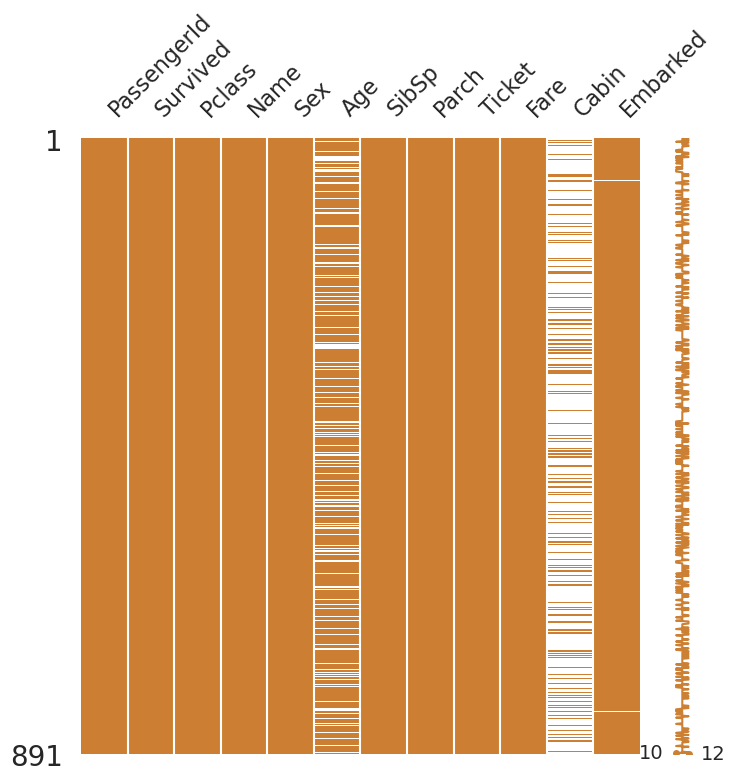

In [11]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

<Axes: >

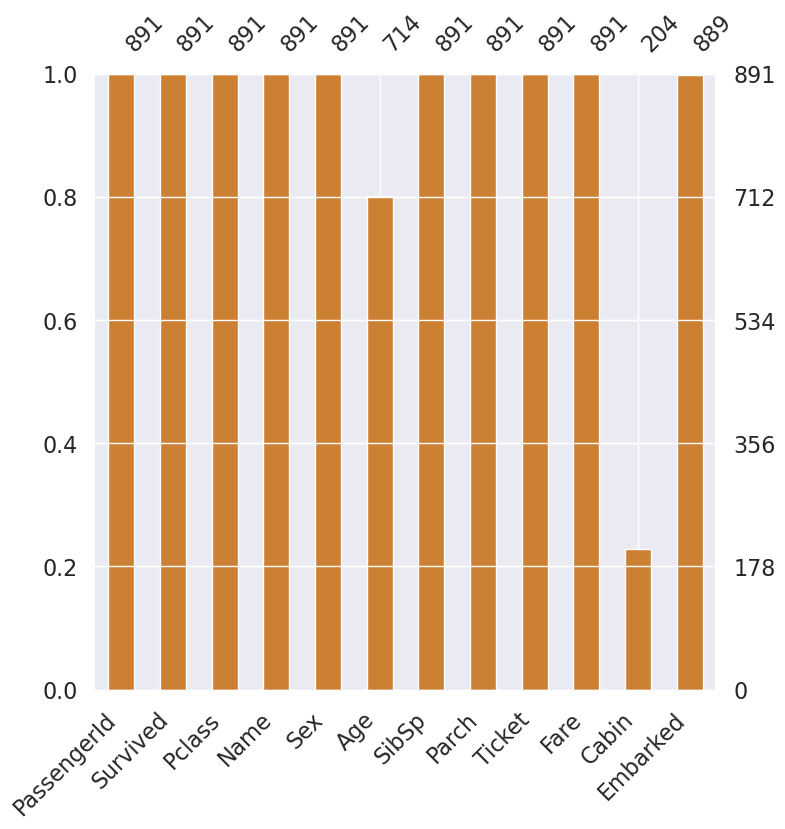

In [12]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

### 1.2 Target label확인

- target label이 어떤 distribution을 가지고 있는지 확인해봐야 함
- 지금 같은 binary classification문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다.

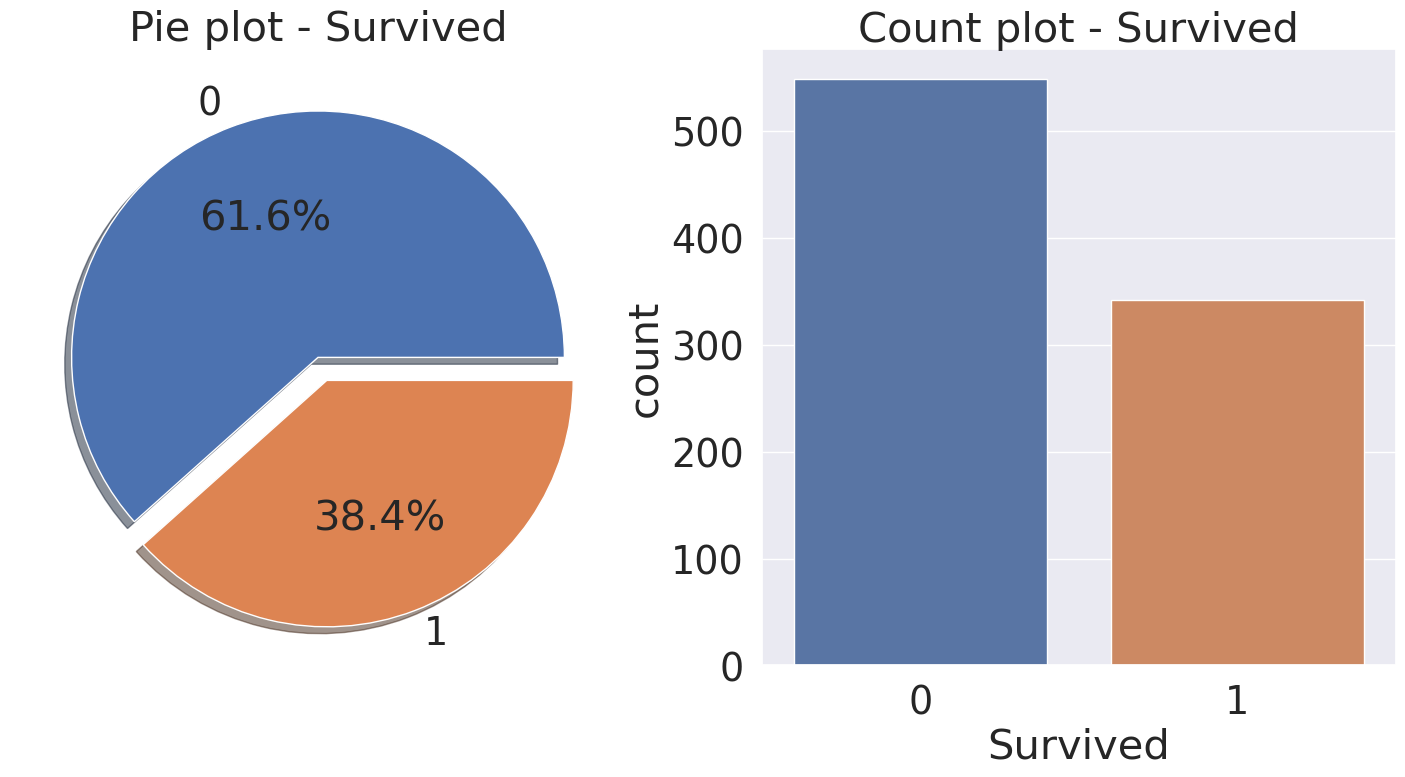

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

### 2.1 P class

- 먼저 Pclass에 대해서 살펴보겠음, Pclass는 ordinal, 서수형 데이터. 카테고리이면서 순서가 있는 데이터 타입
- 먼저 Pclass에 따른 생존률의 차이를 살펴보겠음, 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있음, 또한 pivot이라는 메소드도 있음
- 'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그러고 나면 각 pclass마다 0,1이 count가 되는데, 이를 평균내면 각 pclass별 생존률이 나옴.
- 아래와 같이 count()를 하면, 각 class에 몇명이 있는지 확인 할 수 있으며, sum()을 하면, 214명중 생명한(survived=1) 사람의 총합을 주게 됨.

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pd의 crosstab을 사용하면 좀 더 위 과정을 좀 더 수월하게 볼 수 있음

In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있음. class 1 이면 아래와 같다. 

$$ {80 \over (80+136) } ≈ 0.63 $$

<Axes: xlabel='Pclass'>

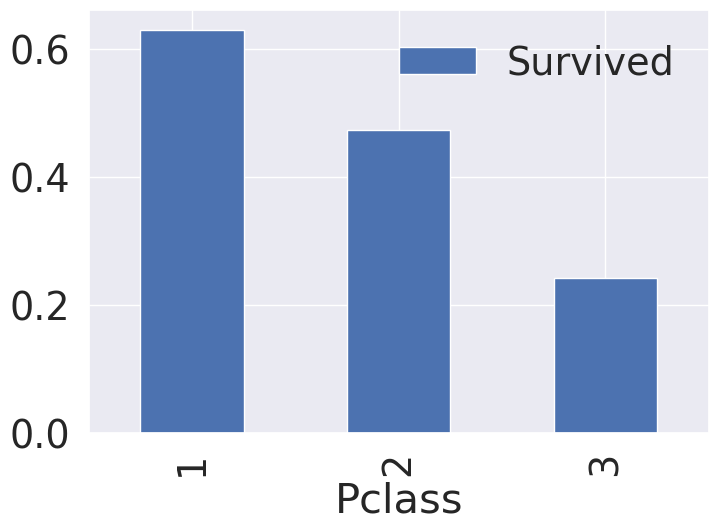

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- 보다시피, Pclass가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있음
- 좀 더 보기 쉽게 그래프를 그리면, seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있음

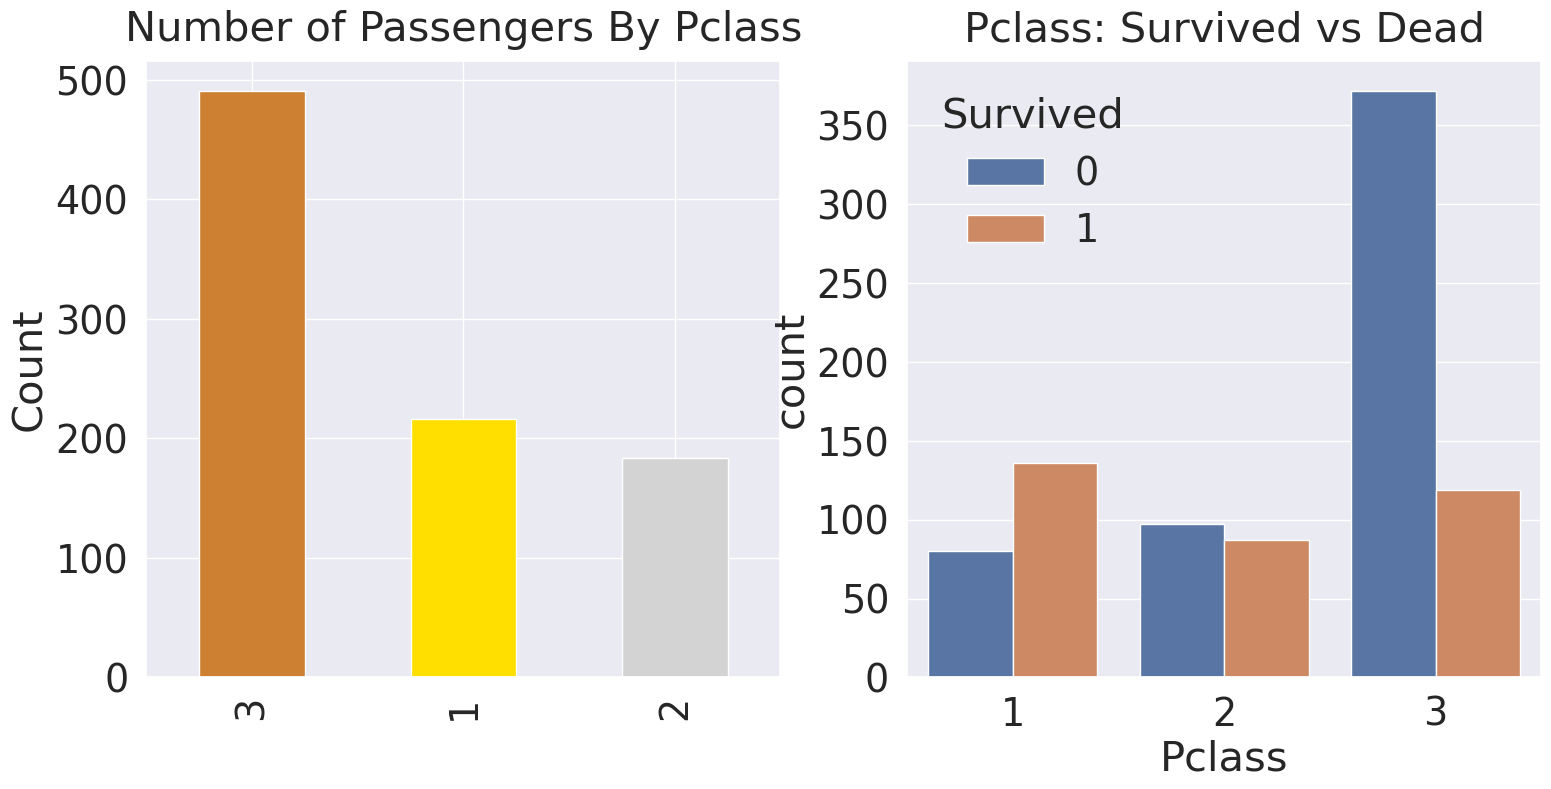

In [19]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록, 생존 확률이 높은 걸 확인할 수 있다. Pclass 1,2,3 순선대로 63%, 48%, 25%임
- 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해 볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있음

### 2.2 Sex

- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인 해보겠음
- 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화해봄

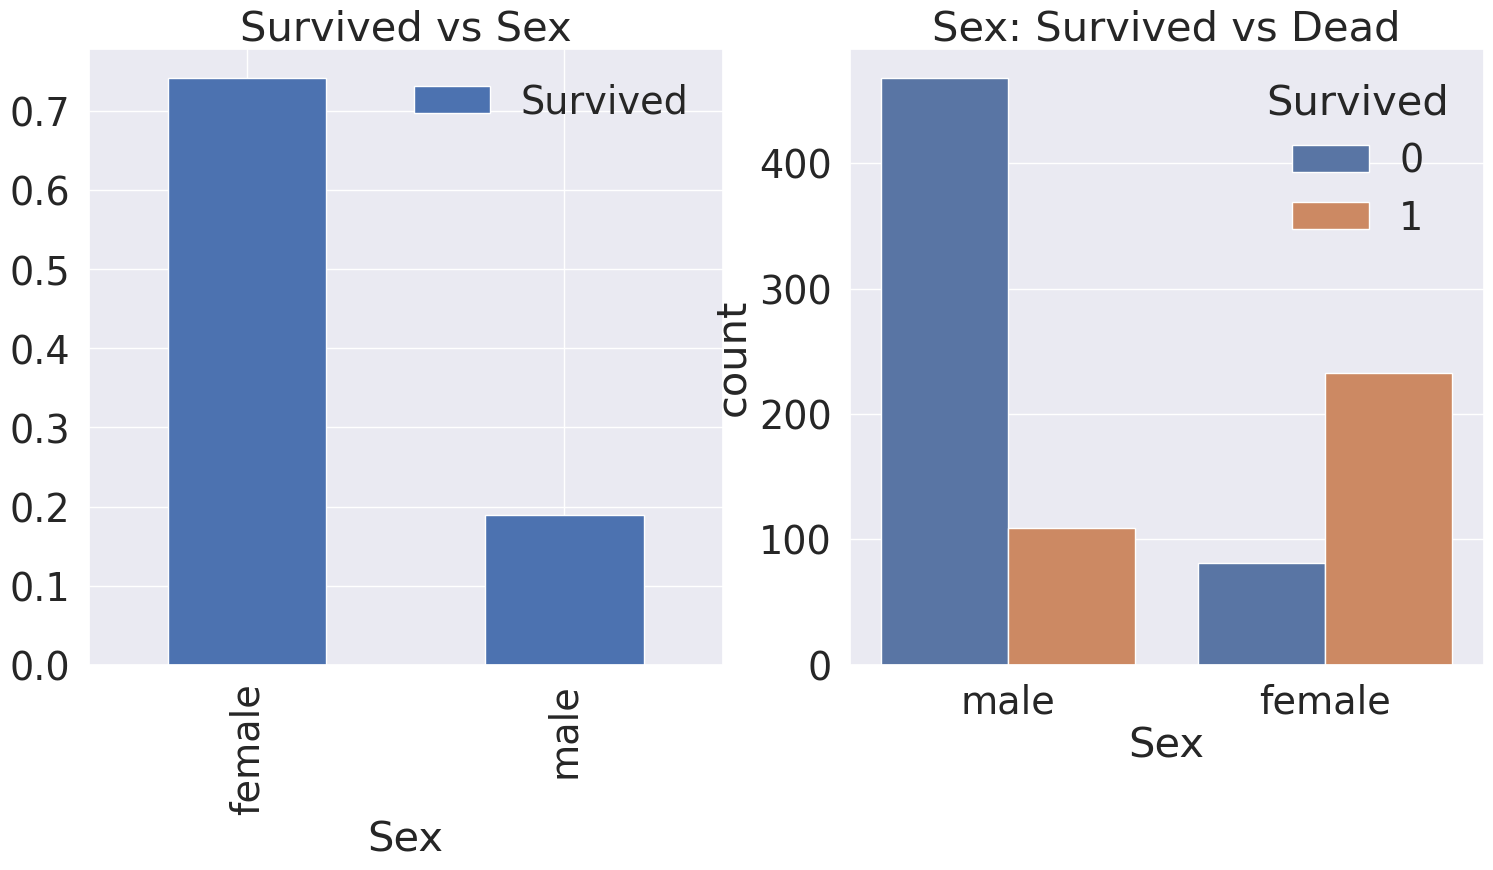

In [20]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
# sns.countplot(data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자가 생존할 확률이 높음.

In [21]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있음.

### 2.3 Both Sex and Pclass

- 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해봄
- seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음

In [23]:
# !pip install -U Seaborn
print(sns.__version__)

0.12.2


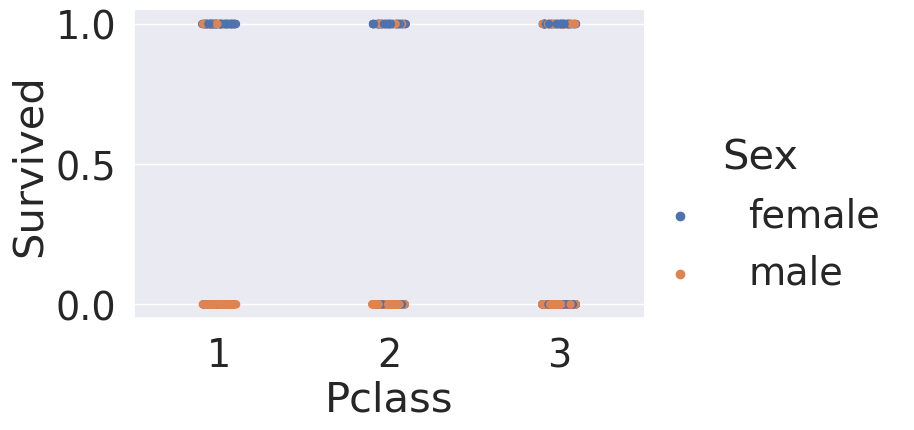

In [24]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있음
- 또한 남자, 여자 상관없이 클래스가 높을수록 살 확률 높음
- 위 그래프는 hue대신 column으로 하면 아래와 같아짐

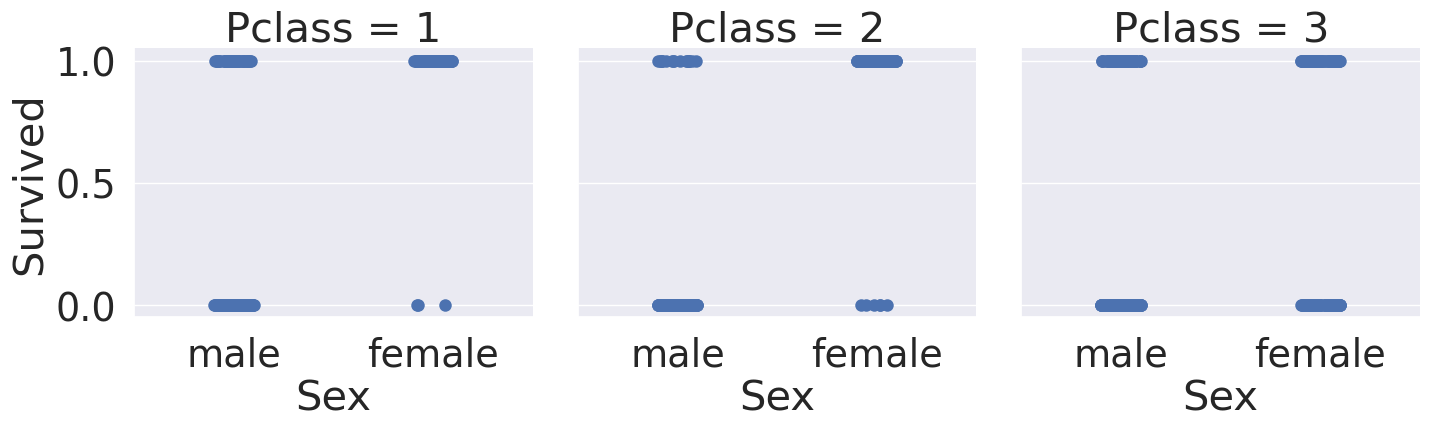

In [25]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, size=9, aspect=1)

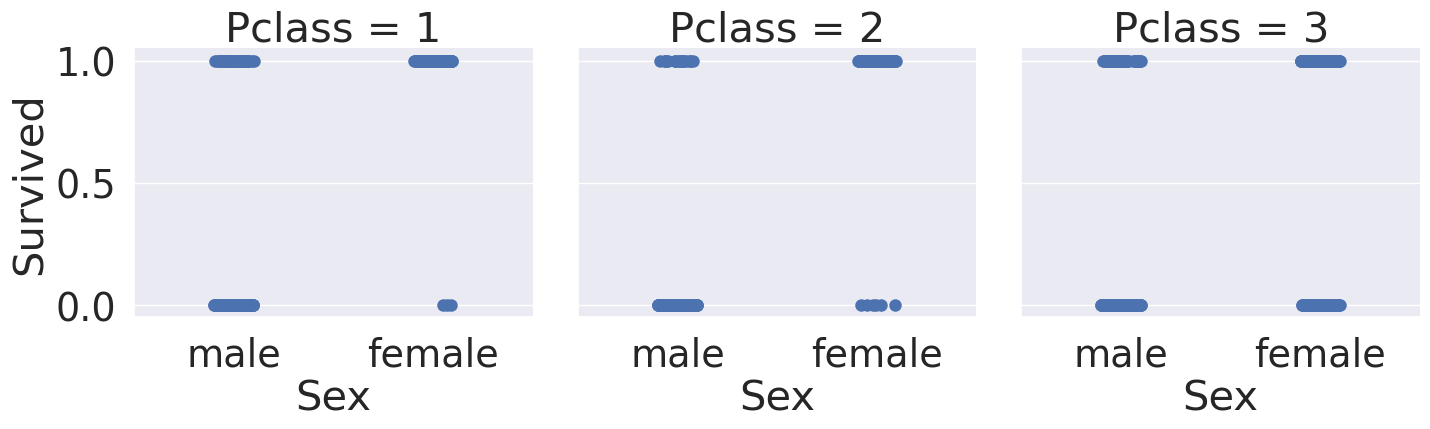

In [26]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, size=9, aspect=1)

### 2.4 Age

- 이번에는 Age feature를 살펴본다.

In [27]:
print('제일 나이 많은 탑승객:{:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객:{:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이:{:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객:80.0 Years
제일 어린 탑승객:0.4 Years
탑승객 평균 나이:29.7 Years


- 생존에 따른 Age의 histogram을 그려보겠음

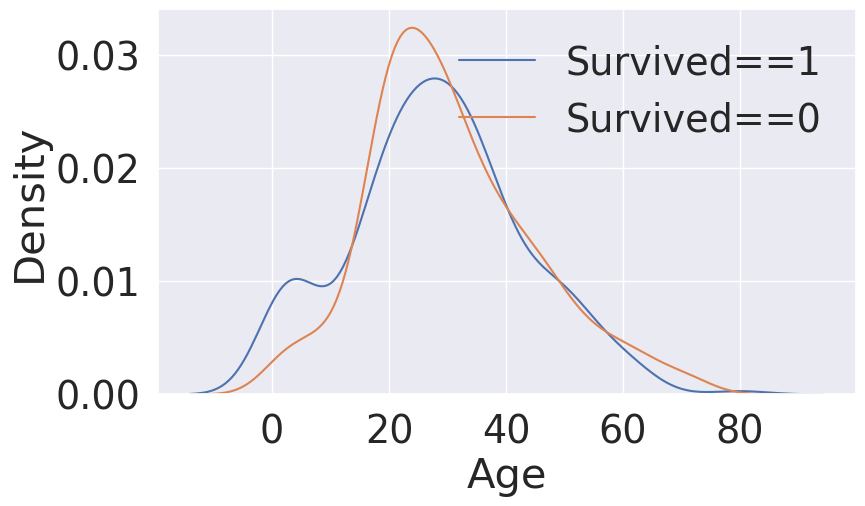

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

- 보다시피, 생존자 중 나이가 어린 경우가 많음을 볼 수 있다. 

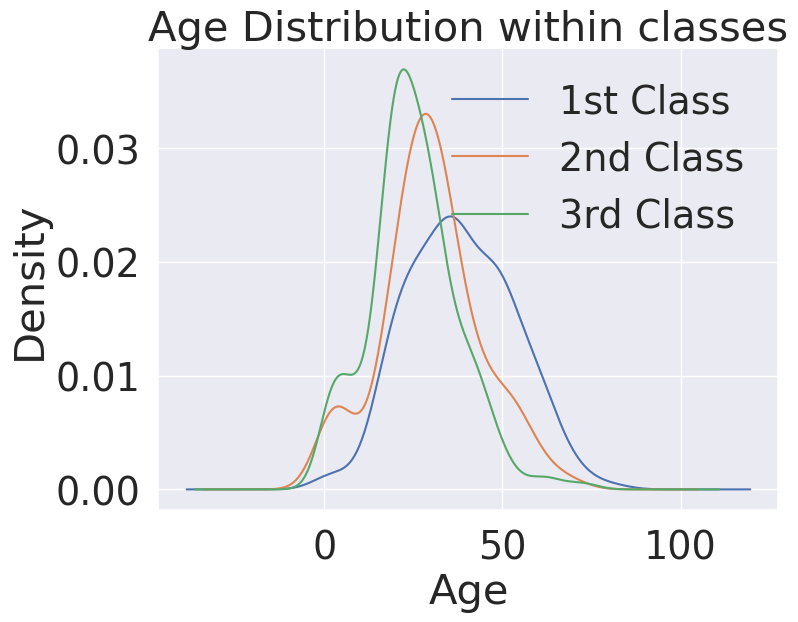

In [29]:
# Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] ==1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] ==2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] ==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- class가 높을 수록 나이 많은 사람의 비중이 커짐
- 나이대가 변하면서 생존률이 어떻게 되는지 보려고 함
- 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 보자.

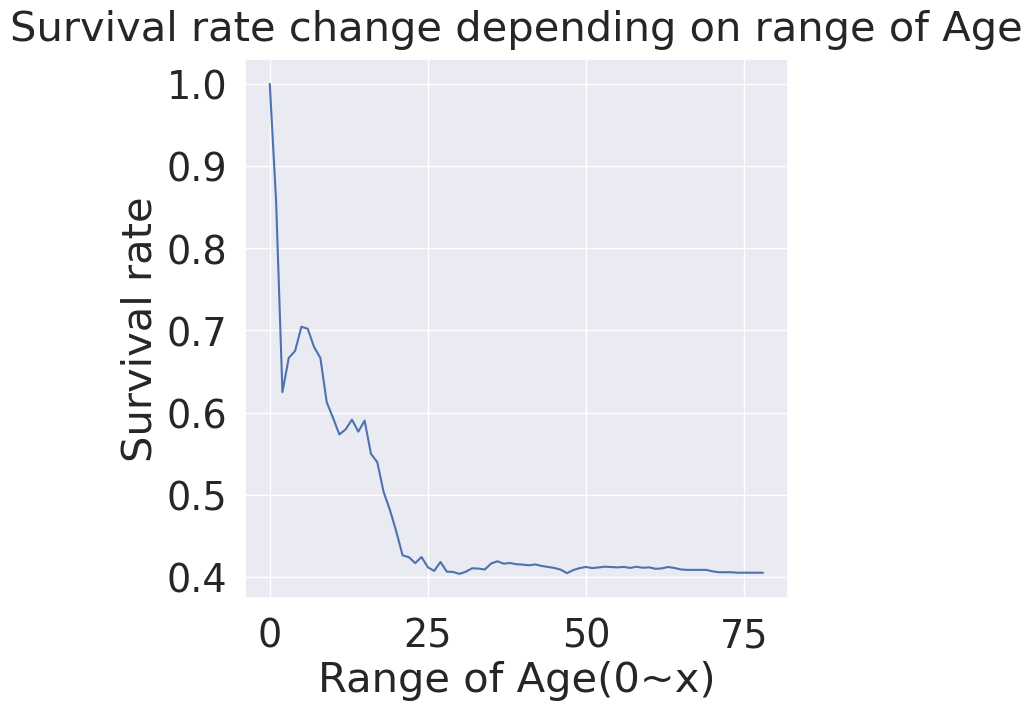

In [30]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y= 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 보다시피, 나이가 어릴 수록 생존률이 확실히 높은 것을 알수 있음
- 이 나이가 중요한 feature로 쓰일 수 있음을 확인했음

### 2.5 Pclass, Sex, Age

- 지금까지 본 Sex, Pclass, Age, Survived 모두에 대해서 보고싶음. 이를 쉽게 그려주는 것이 seaborn의 violinplot임
- x축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex)를 나타내고 y축은 보고 싶어하는 distribution(Age)임
- 한번 그려보겠음

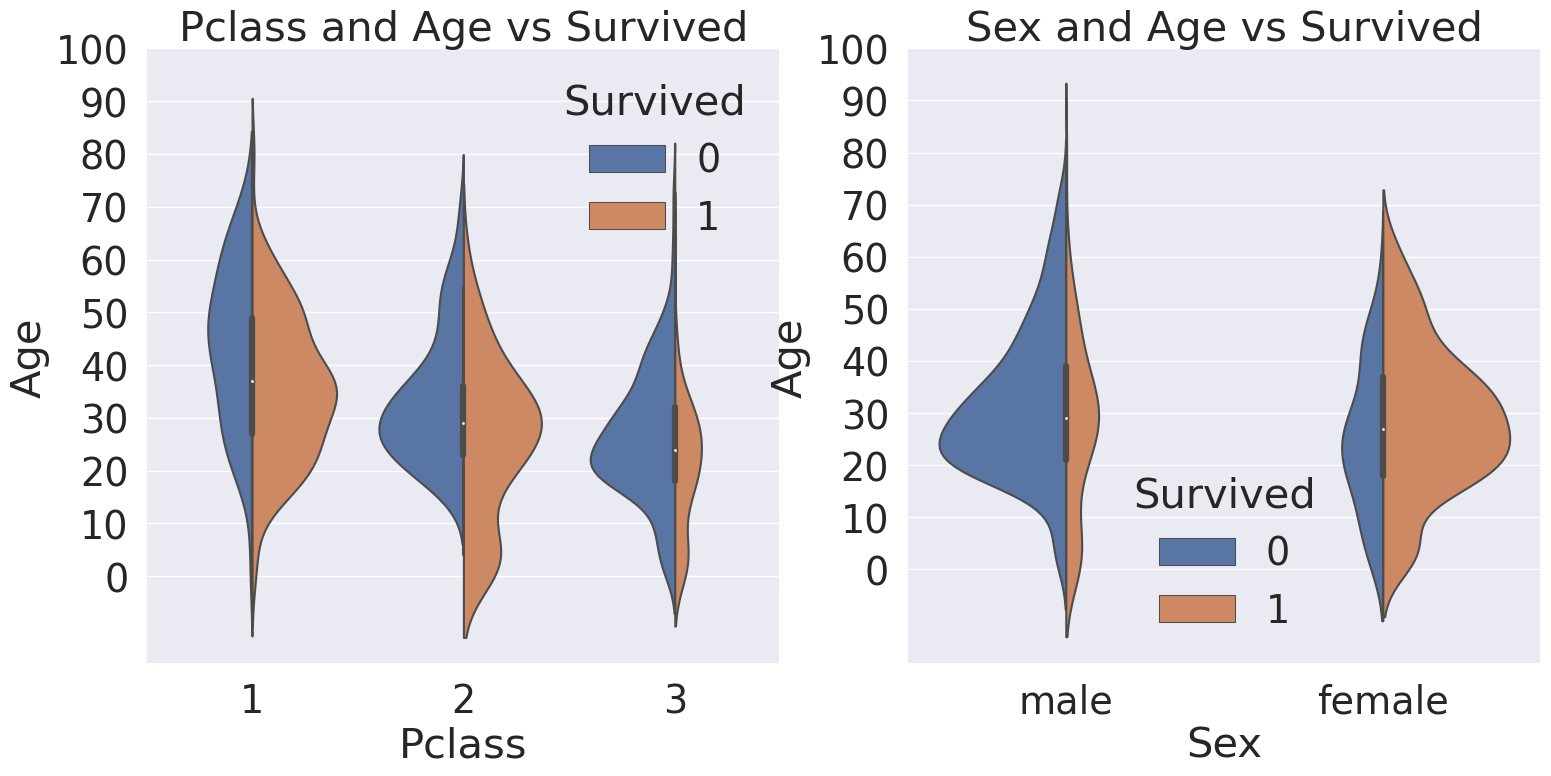

In [31]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
sns.violinplot(x= "Pclass", y="Age", hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
# sns.violinplot(data=df_train[['Pclass', 'Age']], scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
# sns.violinplot(data=df_train[['Sex', 'Age']], scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 왼쪽 그림은 Pclass별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프임
- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프임
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있음
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있음
- 여성과 아이를 먼저 챙긴 것을 볼 수 있음

### 2.6 Embarked
- Embarked는 탑승한 항구를 나타냄
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률를 보겠음

<Axes: xlabel='Embarked'>

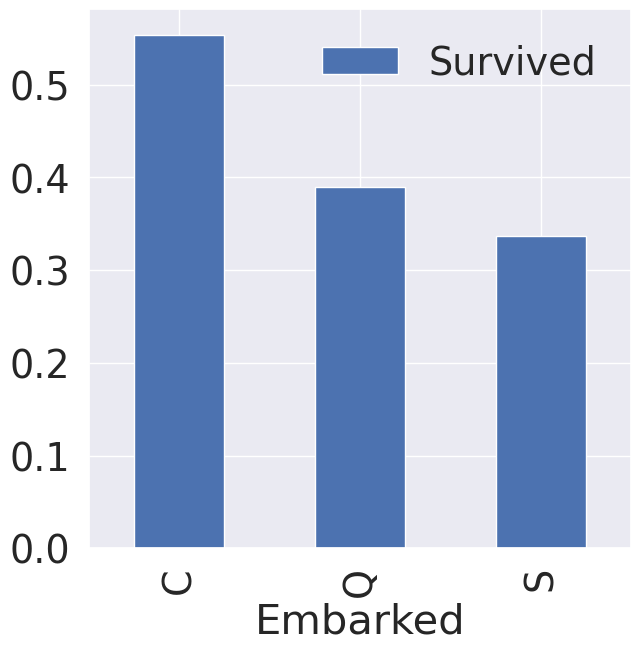

In [32]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 조금의 차이는 있지만 생존률은 좀 비슷한거 같음, 그래도 c가 제일 높다
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠음
- 사실, 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있음, 이는 추후에 모델을 만들고 난 다음에 살펴볼 것임
- 다른 feature로 split하여 한번 살펴보겠음

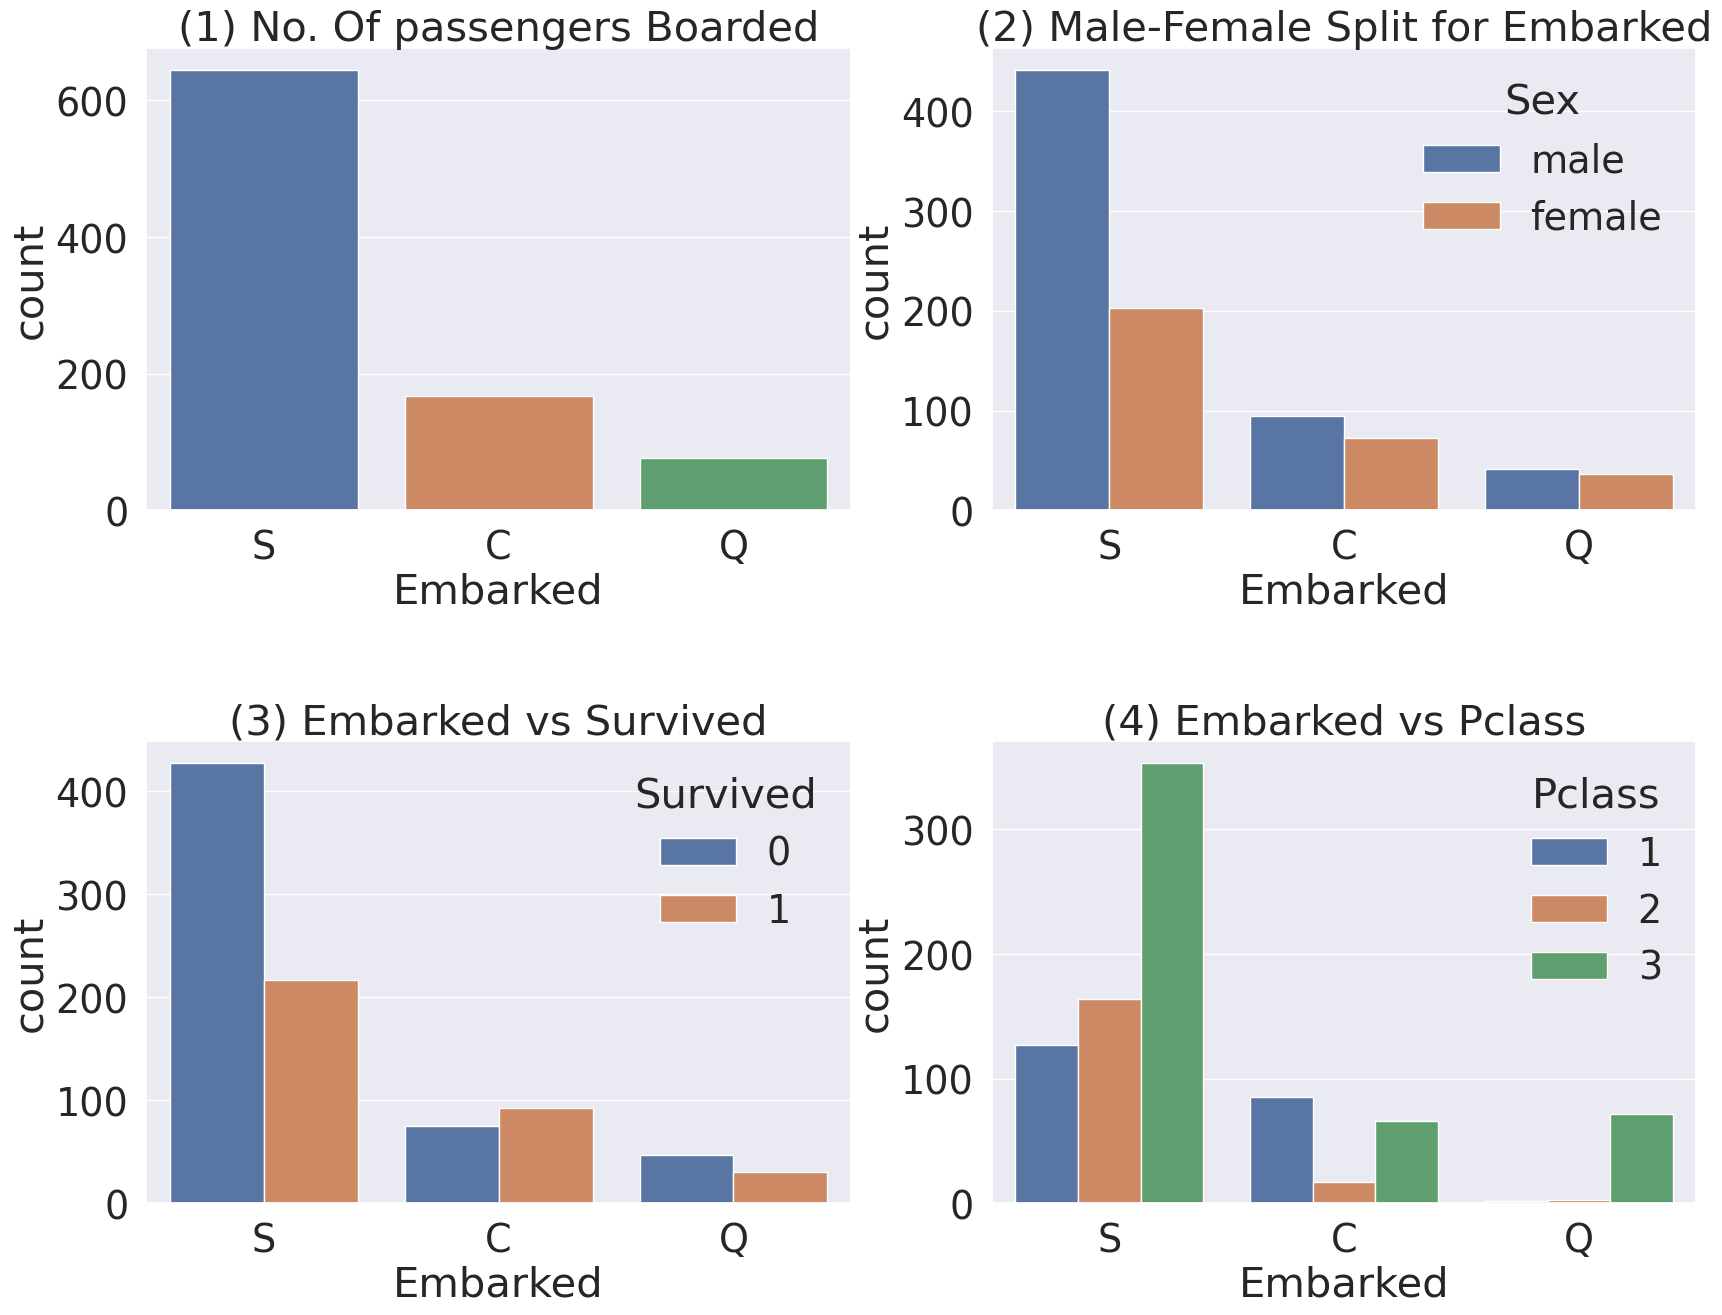

In [33]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0, 0].set_title('(1) No. Of passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했음
- Figure(2) - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많음
- Figure(3) - 생존확률이 S경우 많이 낮은 걸 볼 수 있음 (이전 그래프에서 봤었음)
- Figure(4) - Class로 split 해서 보니, C가 생존확률이 높은 건 클래스가 높은 사람이 많이 타서 그렇다. S는 3rd class가 많아서 생존확률이 낮게 나옴.


### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
- SibSp와 Parch를 합치면 Family가 될 것임, Family로 찹혀서 분석해보자.

In [34]:
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch'] +1  # 자신을 포함해야하니 1을 더한다.
df_test['FamilytSize'] = df_test['SibSp'] + df_test['Parch']+1  # 자신을 포함해야하니 1을 더한다.

In [35]:
print("Maximum Size of Family: ", df_train['FamilySize'].max())
print("Minimum Size of Family: ", df_train['FamilySize'].min())

Maximum Size of Family:  11
Minimum Size of Family:  1


- FamilySize와 생존의 관계를 한번 살펴보자.

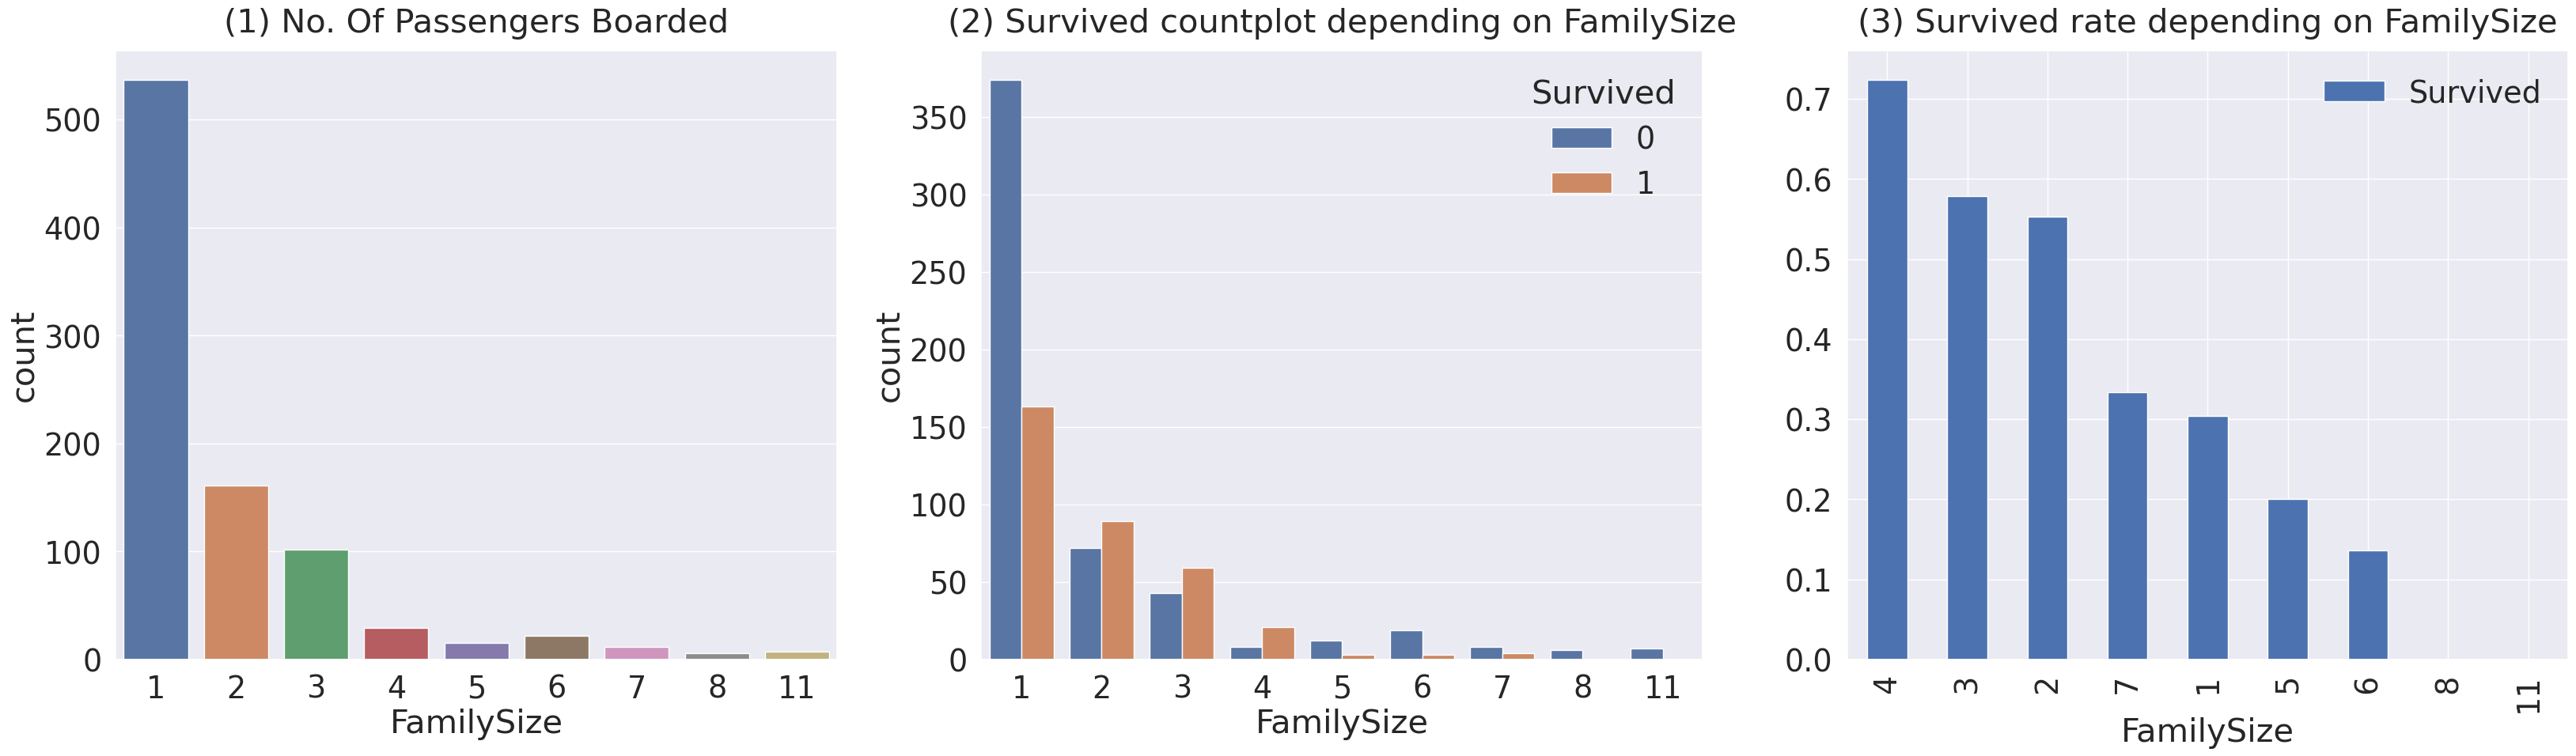

In [37]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare

- Fare는 탑승요금이며, continous feature임, histogram으로 그리면 다음과 같음.

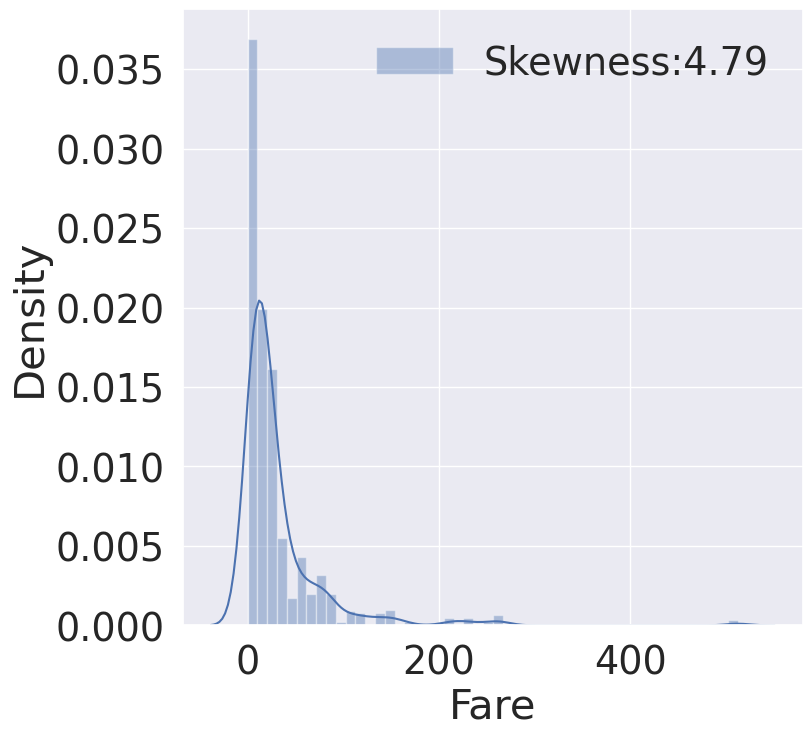

In [38]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭인 것을 알 수 있음(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 합습할 수도 있음, 몇개 없는 outlier에 대해서 너무 민감하게 반응한다면 실제 예측 시에 좋지 못한 결과를 부를 수 있음
- outlier의 영향을 줄이기 위해 Fare에 log를 취하겠음
- 여기서 우리는 pandas의 유용한 기능을 사용할 거임. dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply를 사용하면 매우 손쉽게 적용할 수 있음
- 지금 원하는 것은 Fare columns의 데이터 모두를 log값 취하는 것인데 파이썬의 간단한 lambda함수를 이용해 간단한 로그를 작용하는 함수를 map에 인수로 넣어주면, Fare columns데이터에 그대로 적용이 된다. 매우 용한 기능이니 꼭 숙지바람!

In [39]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()  # testset에 있는 nan value를 평균값으로 치환함
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

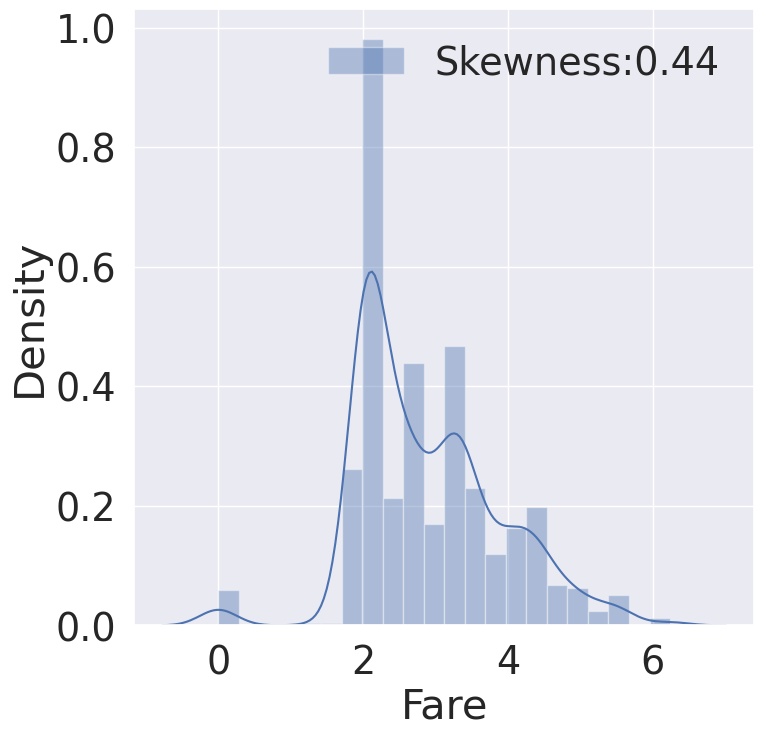

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

****- log를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있음.
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있음
- 사실 방금한 것은 feature engineerig에 들어가는 부분인데, 여기서 작업한 거임
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 우리는 이제 그것을 살펴볼 것임


### 2.9 Cabin
- 이 feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않음
- 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠음

In [41]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [44]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

- ticket number는 매우 다양, 우리는 여기서 어떤 특징을 이끌어내서 생존과 여결시킬 수 있을까?
- 직접 아이디어 내보자. 본격적인 캐글 레이스의 시작점이다.
- 이 튜토리얼에서는 튜토리얼이니 일단 ticket은 넘기도록 하겠음, 튜토리얼을 끝낸 후, 여려ㅓ분의 모델의 성능을 향상시키기 위해 ticket에서 정보를 이끌어내는 것도 좋을듯!